# Predicting air passengers

Models we will use are ARIMA (Autoregressive Integrated Moving Average), LSTM (Long Short Term Memory Neural Network) and Facebook Prophet.

In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.7MB/s 
     |████████████████████████████████| 2.1MB 15.6MB/s 
     |████████████████████████████████| 8.7MB 14.6MB/s 
  Found existing installation: Cython 0.29.19
    Uninstalling Cython-0.29.19:
      Successfully uninstalled Cython-0.29.19
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [3]:
import os
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!pwd
os.chdir('gdrive/My Drive/Colab Notebooks/')
!pwd
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/My Drive/Colab Notebooks
 abcnews-date-text.csv
 ab_data.csv
'A B Test.ipynb'
 AirPassengers.csv
'A method to categorical variable in flight delay datasets.ipynb'
'ARIMA Forecasting.ipynb'
 assignment0.ipynb
'assignment2_(release).ipynb'
 assignment2_sol.ipynb
'Building a Simple Chatbot.ipynb'
 chatbot.txt
'Concrete Compressive Strength Prediction.ipynb'
'Copy of Lecture_6_in_class.ipynb'
 corpus
'COVID-19 Data by ZIP Code.csv'
 dask.

In [40]:
#load the data
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


## Data Preprocessing

In [6]:
df['Month'] = pd.to_datetime(df.Month)
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Text(0.5, 1.0, 'No of air passengers')

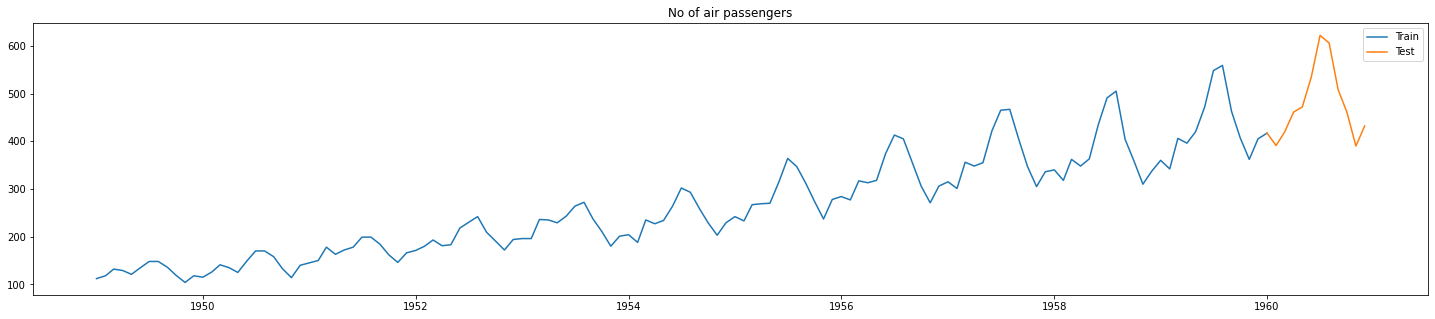

In [8]:
#divide into train and validation set
train = df.loc[:len(df)-12, :] #data[:int(0.7*(len(data)))]
test = df.loc[len(df)-12:, :] #data[int(0.7*(len(data))):]

fig, ax = plt.subplots(figsize=(25, 5))
ax.plot('Month', '#Passengers', data=train, label='Train')
ax.plot('Month', '#Passengers', data=test, label='Test')
ax.legend()
ax.set_title('No of air passengers')

## Building the model

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,1,1,12) [intercept=True]; AIC=906.706, BIC=929.006, Time=3.154 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=914.490, BIC=920.065, Time=0.030 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=909.252, BIC=920.402, Time=0.511 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=910.189, BIC=921.339, Time=0.525 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=912.700, BIC=915.487, Time=0.026 seconds
Fit ARIMA(2,1,2)x(0,1,1,12) [intercept=True]; AIC=907.382, BIC=926.895, Time=2.932 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(2,1,2)x(1,1,0,12) [intercept=True]; AIC=907.138, BIC=926.650, Time=3.283 seconds
Near non-invertible roots for order (2, 1, 2)(1, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
F

Text(0.5, 1.0, 'No of air passengers')

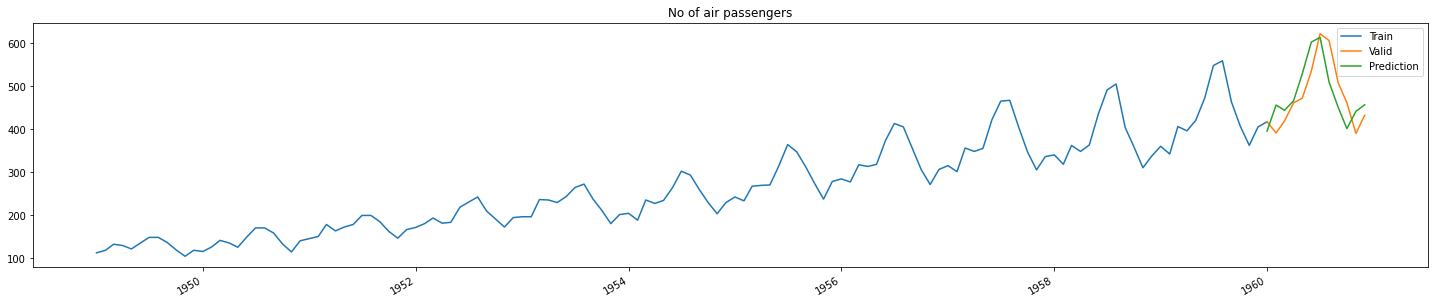

In [9]:
# model = auto_arima(train['#Passengers'], trace=True, error_action='ignore', suppress_warnings=True)
model = auto_arima(train['#Passengers'], 
                   seasonal=True, 
                   m=12,
                   max_p=7, max_d=5, max_q=7, 
                   max_P=4, max_D=4, max_Q=4, 
                   scoring='mse',
                   trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train['#Passengers'])

forecast = test.copy()
forecast['Predicted_Passengers'] = model.predict(n_periods=len(test))

fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(train['Month'], train['#Passengers'], label='Train')
ax.plot(test['Month'], test['#Passengers'], label='Valid')
ax.plot(forecast['Month'], forecast['Predicted_Passengers'], label='Prediction')
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
ax.legend()
ax.set_title('No of air passengers')

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  133
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -442.057
Date:                            Sat, 06 Jun 2020   AIC                            902.114
Time:                                    03:14:03   BIC                            927.202
Sample:                                         0   HQIC                           912.302
                                            - 133                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.008      0.104      0.917      -0.015       0.016
ar.L1          0.3818      0.430      0.889      0.374      -0.460       1.224
ar.L2          0.3962      0.341      1.161      0.246      -0.273       1.065
ma.L1         -0.7453      0.464     -1.605      0.108      -1.655       0.165
ma.L2         -0.2498      0.445     -0.562      0.574      -1.121       0.622
ar.S.L12       0.9805      0.184      5.336      0.000       0.620       1.341
ma.S.L12      -1.2650      0.495     -2.557      0.011      -2.235      -0.295
ma.S.L24       0.3501      0.155      2.255      0.024       0.046       0.654
sigma2        78.5873     27.288      2.880      0.004      25.104     132.071
===================================================================================
Ljung-Box (Q):                       40.70   Jarque-Bera (JB):                 7.28
Prob(Q):                              0.44   Prob(JB):                         0.03
Heteroskedasticity (H):               1.65   Skew:                            -0.28
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Interpretation

In [11]:
forecast.head()

,Month,#Passengers,Predicted_Passengers
132,1960-01-01,417,395.231482
133,1960-02-01,391,455.985205
134,1960-03-01,419,443.794329
135,1960-04-01,461,465.781786
136,1960-05-01,472,529.031305


In [12]:
#calculate rmse
rmse = np.sqrt(mean_squared_error(test['#Passengers'], forecast['Predicted_Passengers']))
print('RMSE: ', rmse)

RMSE:  52.16960769610415


## ARIMA Forecast
Let’s run auto_arima() function to get best p,d,q,P,D,Q values

In [0]:
#load the data
df = pd.read_csv('AirPassengers.csv')

In [5]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


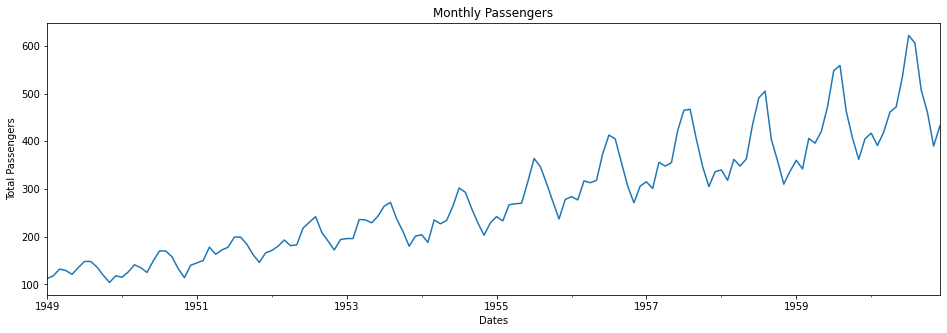

In [8]:
df.index.freq = 'MS'
ax = df['#Passengers'].plot(figsize = (16,5), title = "Monthly Passengers")
ax.set(xlabel='Dates', ylabel='Total Passengers');

When we look at plot we can sey there is a seasonality in data. That’s why we will use SARIMA (Seasonal ARIMA) instead of ARIMA.

Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component. It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

There are four seasonal elements that are not part of ARIMA that must be configured; they are:
- P: Seasonal autoregressive order.
- D: Seasonal difference order.
- Q: Seasonal moving average order.
- m: The number of time steps for a single seasonal period.

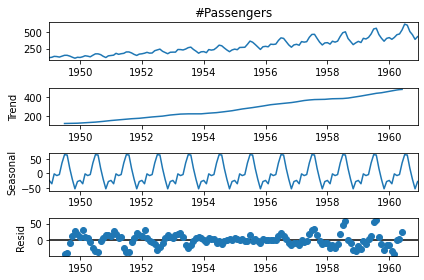

In [9]:
a = seasonal_decompose(df["#Passengers"], model = "add")
a.plot();

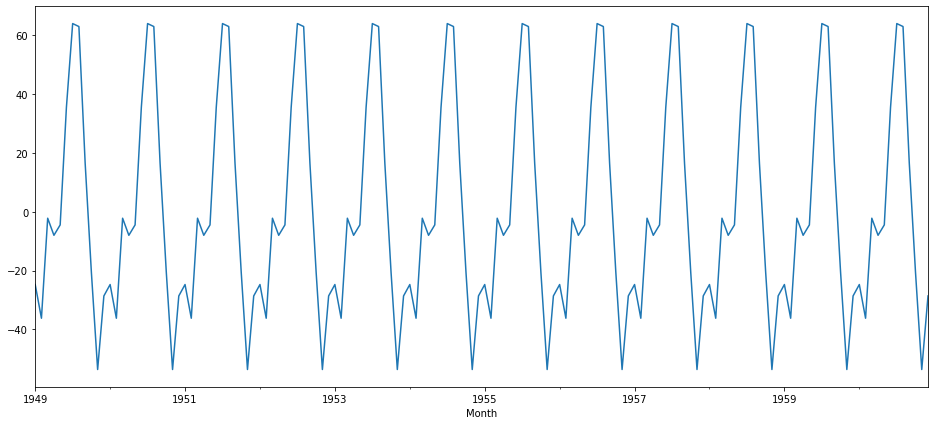

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [11]:
auto_arima(df['#Passengers'], seasonal=True, m=12,
           max_p=7, max_d=5, max_q=7,
           max_P=4, max_D=4, max_Q=4).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -497.354
Date:                              Sat, 06 Jun 2020   AIC                           1014.707
Time:                                      04:33:51   BIC                           1043.459
Sample:                                           0   HQIC                          1026.390
                                              - 144                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2521      0.159      1.587      0.113      -0.059       0.563
ar.L1         -0.2279      0.092     -2.472      0.013      -0.409      -0.047
ar.L2         -0.1712      0.094     -1.819      0.069      -0.356       0.013
ar.L3          0.7038      0.092      7.673      0.000       0.524       0.884
ma.L1         -0.1101      1.361     -0.081      0.936      -2.777       2.557
ma.L2          0.0900      1.212      0.074      0.941      -2.285       2.465
ma.L3         -0.9784      1.345     -0.727      0.467      -3.615       1.658
ar.S.L12      -0.9243      0.207     -4.472      0.000      -1.329      -0.519
ma.S.L12       0.8335      0.302      2.759      0.006       0.241       1.426
sigma2       110.8868    148.548      0.746      0.455    -180.262     402.035
===================================================================================
Ljung-Box (Q):                       39.09   Jarque-Bera (JB):                 8.36
Prob(Q):                              0.51   Prob(JB):                         0.02
Heteroskedasticity (H):               2.25   Skew:                             0.09
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Let’s split the data into train and test set

In [12]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
arima_model = SARIMAX(train_data['#Passengers'], order = (3,1,3), seasonal_order = (1,1,1,12))
arima_result = arima_model.fit()
arima_result.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          #Passengers   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -442.058
Date:                              Sat, 06 Jun 2020   AIC                            902.117
Time:                                      04:33:55   BIC                            927.129
Sample:                                  01-01-1949   HQIC                           912.274
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2785      0.344      0.809      0.419      -0.396       0.953
ar.L2         -0.1156      0.297     -0.389      0.697      -0.698       0.467
ar.L3          0.4212      0.264      1.593      0.111      -0.097       0.939
ma.L1         -0.5329      0.323     -1.649      0.099      -1.166       0.100
ma.L2          0.2777      0.285      0.974      0.330      -0.281       0.837
ma.L3         -0.6808      0.230     -2.965      0.003      -1.131      -0.231
ar.S.L12      -0.9516      0.204     -4.675      0.000      -1.351      -0.553
ma.S.L12       0.8811      0.314      2.804      0.005       0.265       1.497
sigma2        95.8332     11.592      8.267      0.000      73.113     118.553
===================================================================================
Ljung-Box (Q):                       35.50   Jarque-Bera (JB):                 5.35
Prob(Q):                              0.67   Prob(JB):                         0.07
Heteroskedasticity (H):               1.44   Skew:                            -0.19
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1960-01-01    420.798199
1960-02-01    401.655389
1960-03-01    454.274940
1960-04-01    438.848317
1960-05-01    462.561876
1960-06-01    516.249154
1960-07-01    588.343206
1960-08-01    600.021293
1960-09-01    499.664879
1960-10-01    444.317476
1960-11-01    399.645898
1960-12-01    440.910631
Freq: MS, Name: ARIMA Predictions, dtype: float64

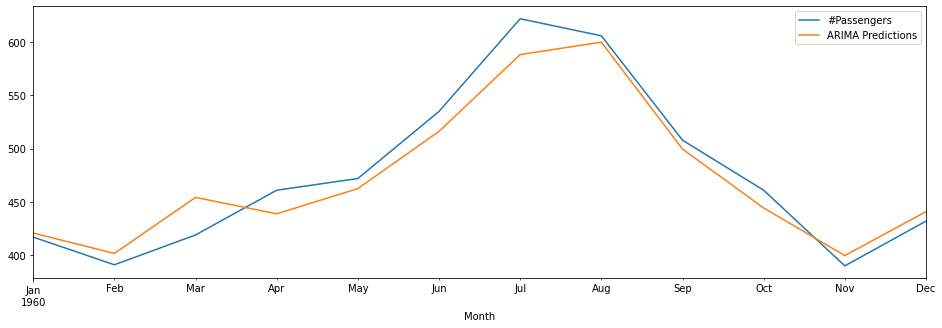

In [14]:
test_data['#Passengers'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [15]:
arima_rmse_error = rmse(test_data['#Passengers'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['#Passengers'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 332.70022659614386
RMSE Error: 18.240072000848677
Mean: 280.2986111111111


In [16]:
test_data['ARIMA_Predictions'] = arima_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## LSTM Forecast
First, we’ll scale our train and test data with MinMaxScaler


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

Before creating LSTM model we should create a Time Series Generator object.

In [18]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [19]:
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20
120/120 [==============================] - 2s 15ms/step - loss: 0.0264
Epoch 2/20
120/120 [==============================] - 1s 12ms/step - loss: 0.0142
Epoch 3/20
120/120 [==============================] - 1s 11ms/step - loss: 0.0122
Epoch 4/20
120/120 [==============================] - 1s 11ms/step - loss: 0.0113
Epoch 5/20
120/120 [==============================] - 1s 11ms/step - loss: 0.0102
Epoch 6/20
120/120 [==============================] - 1s 11ms/step - loss: 0.0090
Epoch 7/20
120/120 [==============================] - 1s 12ms/step - loss: 0.0077
Epoch 8/20
120/120 [==============================] - 1s 11ms/step - loss: 0.0049
Epoch 9/20
120/120 [==============================] - 1s 11ms/step - loss: 0.0062
Epoch 10/20
120/120 [==============================] - 1s 12ms/step - loss: 0.0058
Epoch 11/20
120/120 [==============================] - 2s 13ms/step - loss: 0.0032
Epoch 12/20
120/120 [==============================] - 1s 12ms/step - loss: 0.0030
Epoch 13/20
1

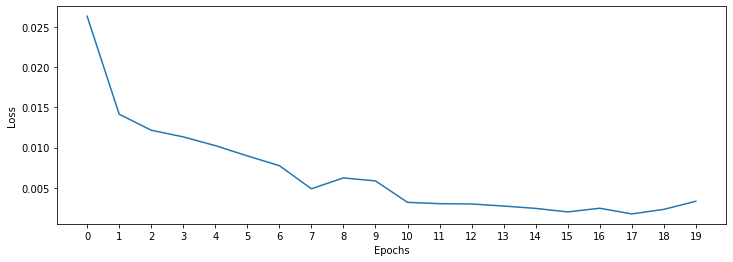

In [20]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [0]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [22]:
lstm_predictions_scaled

[array([0.57851446], dtype=float32),
 array([0.57377595], dtype=float32),
 array([0.62551117], dtype=float32),
 array([0.65480185], dtype=float32),
 array([0.72674537], dtype=float32),
 array([0.8238914], dtype=float32),
 array([0.9015736], dtype=float32),
 array([0.93272793], dtype=float32),
 array([0.8443284], dtype=float32),
 array([0.7225582], dtype=float32),
 array([0.6494849], dtype=float32),
 array([0.6440703], dtype=float32)]

In [23]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[367.22407782],
       [365.06805593],
       [388.60758209],
       [401.93483973],
       [434.66914201],
       [478.87058759],
       [514.21598727],
       [528.39120948],
       [488.16942358],
       [432.76398116],
       [399.51561713],
       [397.05199891]])

In [24]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,#Passengers,ARIMA_Predictions,LSTM_Predictions
Month,,,
1960-01-01,417,420.798199,367.224078
1960-02-01,391,401.655389,365.068056
1960-03-01,419,454.274940,388.607582
1960-04-01,461,438.848317,401.934840
1960-05-01,472,462.561876,434.669142
1960-06-01,535,516.249154,478.870588
1960-07-01,622,588.343206,514.215987
1960-08-01,606,600.021293,528.391209
1960-09-01,508,499.664879,488.169424


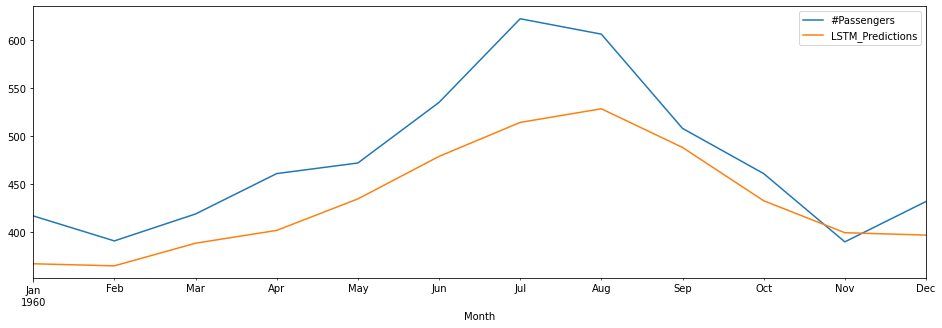

In [25]:
test_data['#Passengers'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [26]:
lstm_rmse_error = rmse(test_data['#Passengers'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['#Passengers'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 2687.463025822784
RMSE Error: 51.84074677146138
Mean: 280.2986111111111


## Prophet Forecast

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [28]:
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
139,1960-08-01,467.898670,501.422964,551.953784,467.630152,468.168429,59.311557,59.311557,59.311557,59.311557,59.311557,59.311557,0.0,0.0,0.0,527.210227
140,1960-09-01,470.917288,460.552940,512.566938,470.577176,471.248594,15.113870,15.113870,15.113870,15.113870,15.113870,15.113870,0.0,0.0,0.0,486.031158
141,1960-10-01,473.838531,427.725494,478.654959,473.428603,474.229886,-21.492966,-21.492966,-21.492966,-21.492966,-21.492966,-21.492966,0.0,0.0,0.0,452.345565
142,1960-11-01,476.857149,395.777668,447.325968,476.399610,477.324160,-54.321689,-54.321689,-54.321689,-54.321689,-54.321689,-54.321689,0.0,0.0,0.0,422.535460
143,1960-12-01,479.778392,423.024820,474.179297,479.249653,480.320542,-31.949742,-31.949742,-31.949742,-31.949742,-31.949742,-31.949742,0.0,0.0,0.0,447.828651


In [29]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
1960-01-01,424.867297
1960-02-01,421.474389
1960-03-01,456.964802
1960-04-01,451.392919
1960-05-01,453.879051
1960-06-01,493.694875
1960-07-01,523.773060
1960-08-01,527.210227
1960-09-01,486.031158


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



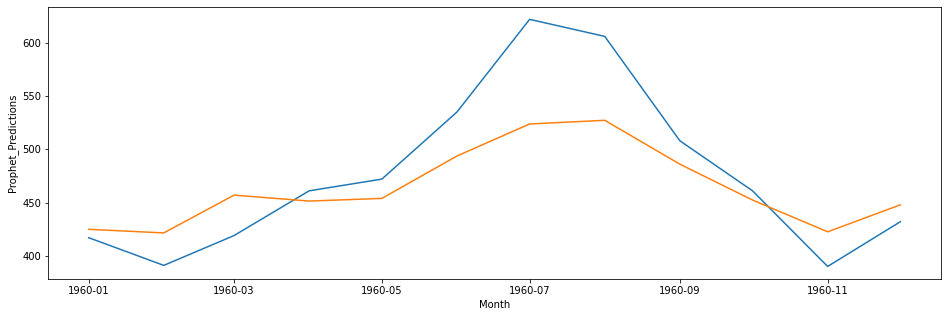

In [30]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["#Passengers"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [31]:
prophet_rmse_error = rmse(test_data['#Passengers'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['#Passengers'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 1856.8065682600466
RMSE Error: 43.090678438150015
Mean: 280.2986111111111


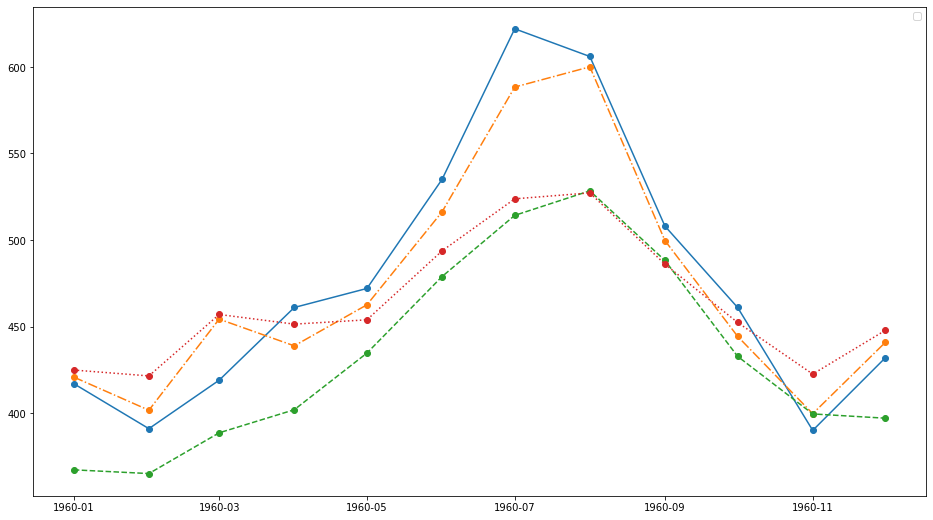

In [32]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["#Passengers"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [34]:
print(f"Mean: {test_data['#Passengers'].mean()}")
errors

Mean: 476.1666666666667


,Models,RMSE Errors,MSE Errors
0,ARIMA,18.240072,332.700227
1,LSTM,51.840747,2687.463026
2,Prophet,43.090678,1856.806568


In [35]:
test_data

,#Passengers,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
Month,,,,
1960-01-01,417,420.798199,367.224078,424.867297
1960-02-01,391,401.655389,365.068056,421.474389
1960-03-01,419,454.274940,388.607582,456.964802
1960-04-01,461,438.848317,401.934840,451.392919
1960-05-01,472,462.561876,434.669142,453.879051
1960-06-01,535,516.249154,478.870588,493.694875
1960-07-01,622,588.343206,514.215987,523.773060
1960-08-01,606,600.021293,528.391209,527.210227
1960-09-01,508,499.664879,488.169424,486.031158


These ways are just quick and basic predictions. Therefore, you can improve these models with tuning and according to your data and business knowledge.